In [36]:
import numpy as np
from floquet_simulations.plot_functions import PlotParams, PlotAbsRealImagHamiltonian, PlotRealHamiltonian
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from scipy.special import  jv
import matplotlib.pyplot as plt

## optimise for tunnelling 45*

In [37]:
ymin = jv(0, 3.8316)
ndiffs = 12
omega = 8
drive_style = "alternating"
gradients = np.linspace(ymin, -ymin, ndiffs) # for linear
bessel_arguements = ComputeAValsFromRequiredGradients(gradients)
Avals = GetAValsFromBesselXVals(bessel_arguements, omega, addition_type=drive_style, constant_shift="zero centre")


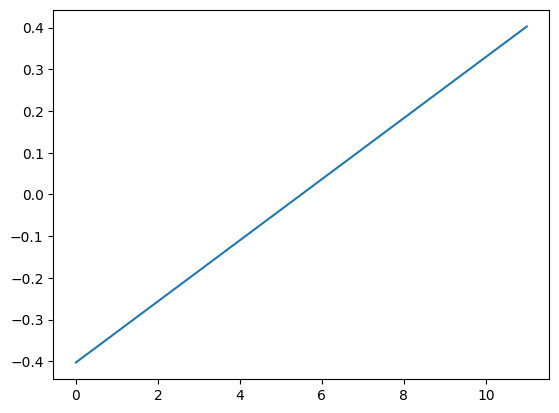

In [38]:
tunnellings = [jv(0,(Avals[i] - Avals[i+1])/omega) for i in range(len(Avals)-1)]
plt.plot(range(12), tunnellings)

In [39]:
l1 = jv(0,(Avals[0] - Avals[1])/omega)
l2 = jv(0,(Avals[1] - Avals[2])/omega)
l3 = jv(0,(Avals[2] - Avals[3])/omega)
l4 = jv(0,(Avals[3] - Avals[4])/omega)
l5 = jv(0,(Avals[4] - Avals[5])/omega)
l6 = jv(0,(Avals[5] - Avals[6])/omega)
l7 = jv(0,(Avals[6] - Avals[7])/omega)
l8 = jv(0,(Avals[7] - Avals[8])/omega)
l9 = jv(0,(Avals[8] - Avals[9])/omega)
l10 = jv(0,(Avals[9] - Avals[10])/omega)
l11 = jv(0,(Avals[10] - Avals[11])/omega)
l12 = jv(0,(Avals[11] - Avals[12])/omega)

b5 = jv(0, (Avals[3] - Avals[6])/omega)
b7 = jv(0, (Avals[5] - Avals[8])/omega)
b9 = jv(0, (Avals[10] - Avals[7])/omega)
b11 = jv(0, (Avals[12] - Avals[9])/omega)

line_45 = [l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12]
line_0 = [l1, l2, l3, b5, l6, b7, l9, b11]

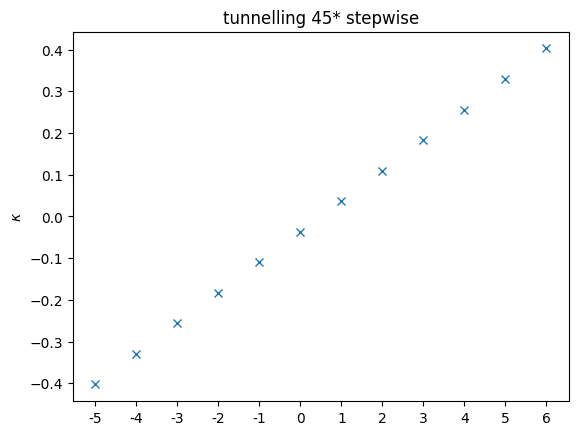

/tmp/ipykernel_6278/239220436.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in range(-5, 6)])


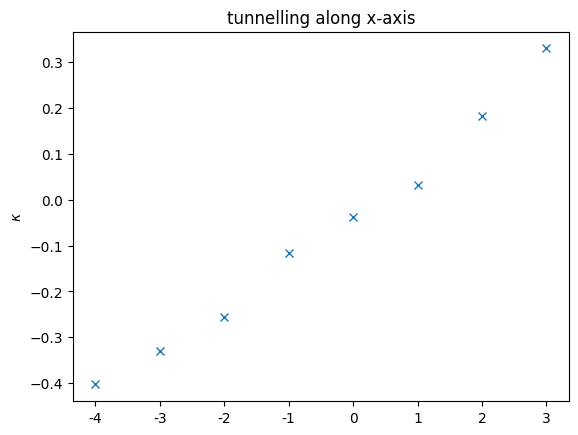

In [45]:
fig, ax = plt.subplots()
plt.plot(range(12), line_45, 'x')
plt.title("tunnelling 45* stepwise")
plt.ylabel(r"$\kappa$")
ax.set_xticks(range(0,12))
ax.set_xticklabels([str(i) for i in range(-5, 7)])
plt.show()

fig, ax = plt.subplots()
plt.plot(range(8), line_0, 'x')
plt.title("tunnelling along x-axis")
plt.ylabel(r"$\kappa$")
ax.set_xticklabels([str(i) for i in range(-5, 6)])
plt.show()

## optimise for tunnelling along axis

In [48]:
ymin = jv(0, 3.8316)
ndiffs = 8
omega = 8
drive_style = "alternating"
gradients = np.linspace(ymin, -ymin, ndiffs) # for linear
bessel_arguements = ComputeAValsFromRequiredGradients(gradients)
Avals = GetAValsFromBesselXVals(bessel_arguements, omega, addition_type=drive_style, constant_shift="zero centre")

In [49]:
A0 = Avals[0]; A1 = Avals[1]; A2 = Avals[2]; A3 = Avals[3]; A6 = Avals[4];A5 = Avals[5]; A8 = Avals[6]; A9 = Avals[7]; A12 = Avals[8]

k1 = jv(0,(A0 - A1)/omega)
k2 = jv(0,(A1 - A2)/omega)
k3 = jv(0,(A2 - A3)/omega)
# k4 = jv(0,(A3- A4)/omega)
# k5 = jv(0,(A4 - A5)/omega)
k6 = jv(0,(A5 - A6)/omega)
# k7 = jv(0,(A6 - A7)/omega)
# k8 = jv(0,(A7 -A8)/omega)
k9 = jv(0,(A8 - A9)/omega)
# k10 = jv(0,(A9 - A10)/omega)
# k11 = jv(0,(A10 - A11)/omega)
# k12 = jv(0,(A11 - A12)/omega)

b5 = jv(0, (A3 - A6)/omega)
b7 = jv(0, (A5 - A8)/omega)
# b9 = jv(0, (A10 - A7)/omega)
b11 = jv(0, (A12 - A9)/omega)


In [50]:
#find odd ones out
k4_t = np.linspace(k3, k6, 4)[1]
k5_t = np.linspace(k3, k6, 4)[2]
bessel_arguments = ComputeAValsFromRequiredGradients([k4_t, k5_t])
A4 =  A3 - bessel_arguments[0]*omega
k4 = jv(0,(A3- A4)/omega)
k5 = jv(0,(A4 - A5)/omega)

k7_t = np.linspace(k6, k9, 4)[1]
k8_t = np.linspace(k6, k9, 4)[2]
bessel_arguments = ComputeAValsFromRequiredGradients([k7_t, k8_t])
A7 = bessel_arguments[0]*omega +  A6 
k7 = jv(0,(A6 - A7)/omega)
k8 = jv(0,(A7 -A8)/omega)


k10_t = k9 + (k9 - k1)/8
k11_t = k9 + 2*(k9 - k1)/8
k12_t = k9 + 3*(k9 - k1)/8

bessel_arguments = ComputeAValsFromRequiredGradients([k10_t, k11_t, k12_t])
A10 =   A9 - bessel_arguments[0]*omega
k10 = jv(0,(A9 - A10)/omega)
A11=  bessel_arguments[0]*omega+ A12
k11 = jv(0,(A10 - A11)/omega)
k12 = jv(0,(A11 - A12)/omega)


line_45 = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12]
line_0 = [k1, k2, k3, b5, k6, b7, k9, b11]

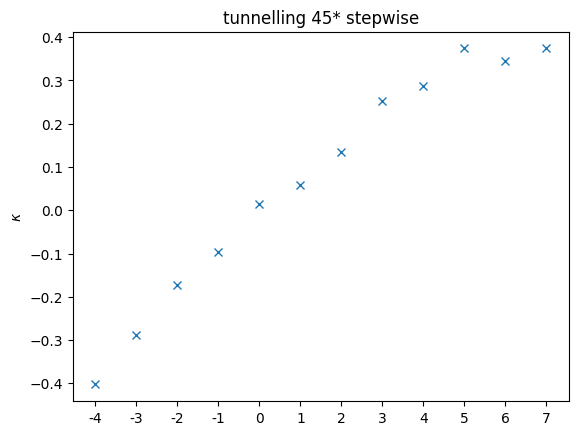

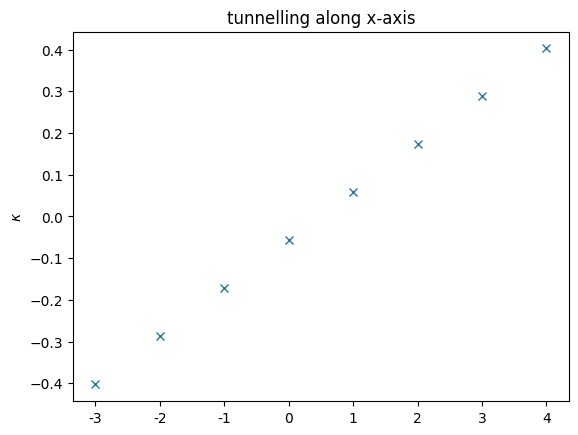

In [55]:
fig, ax = plt.subplots()
plt.plot(range(12), line_45, 'x')
plt.title("tunnelling 45* stepwise")
plt.ylabel(r"$\kappa$")
ax.set_xticks(range(0,12))
ax.set_xticklabels([str(i) for i in range(-4, 8)])
plt.show()

fig, ax = plt.subplots()
plt.plot(range(8), line_0, 'x')
plt.title("tunnelling along x-axis")
plt.ylabel(r"$\kappa$")
ax.set_xticks(range(0,8))
ax.set_xticklabels([str(i) for i in range(-3, 5)])
plt.show()